# üí† Distribuciones muestrales

## 1. Distribuci√≥n *t* de Student

Sean:

Sean:

- $X \sim \mathcal{N}(0,1)$  
- $Y \sim \chi^2(n - 1)$  

Entonces:

$$
T = \frac{X \cdot \sqrt{n}}{\sqrt{\dfrac{Y}{n - 1}}} \sim t(n - 1)
$$

Gr√°ficamente, la distribuci√≥n *t* tiene forma de campana, similar a la normal est√°ndar, pero con colas m√°s gruesas. A medida que $n \to \infty$, se aproxima a una normal est√°ndar:

$$
\lim_{n \to \infty} t(n) = \mathcal{N}(0,1)
$$

---

> üìå Esta distribuci√≥n es √∫til cuando se desconoce la varianza poblacional y se utiliza una estimaci√≥n muestral.


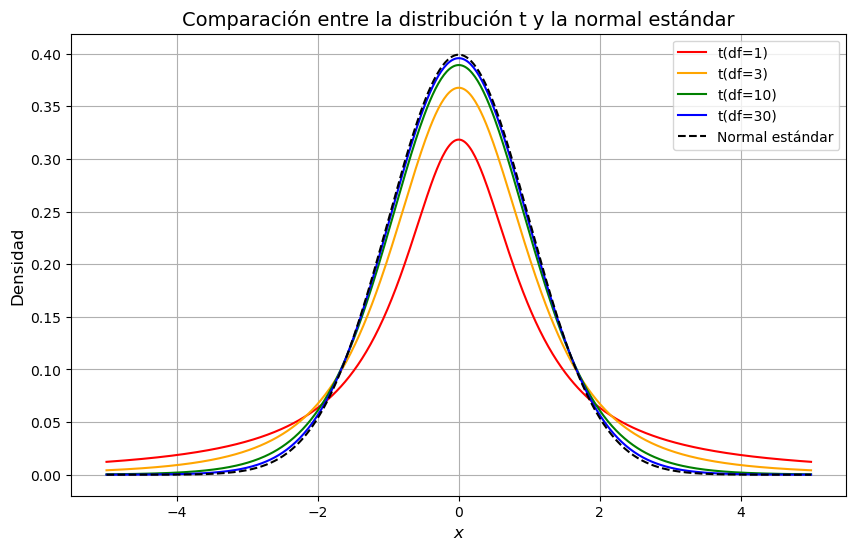

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Valores de x para graficar
x = np.linspace(-5, 5, 500)

# Distribuciones t con diferentes grados de libertad
dfs = [1, 3, 10, 30]
colors = ['red', 'orange', 'green', 'blue']

plt.figure(figsize=(10, 6))

# Graficar curvas t
for df, color in zip(dfs, colors):
    plt.plot(x, t.pdf(x, df), label=f't(df={df})', color=color)

# Graficar la normal est√°ndar
plt.plot(x, norm.pdf(x), 'k--', label='Normal est√°ndar')

# Formato de la gr√°fica
plt.title('Comparaci√≥n entre la distribuci√≥n t y la normal est√°ndar', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Par√°metros del ejemplo
n = 16                     # tama√±o de muestra
df = n - 1                 # grados de libertad
media_muestral = 17.5
media_hipotetica = 16
desv_est_muestral = 3

# Estad√≠stica t
t_stat = (media_muestral - media_hipotetica) / (desv_est_muestral / np.sqrt(n))
print(f'Estad√≠stica t: {t_stat:.3f}')

# Intervalo de confianza del 95%
alpha = 0.05
t_critico = t.ppf(1 - alpha/2, df)
print(f'Valor cr√≠tico t (95%): ¬±{t_critico:.3f}')

# Gr√°fica
x = np.linspace(-5, 5, 500)
y = t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label=f't(df={df})', color='blue')

# Rellenar √°rea bajo la curva para el IC
plt.fill_between(x, y, where=(x >= -t_critico) & (x <= t_critico), color='lightblue', alpha=0.6, label='√Årea 95%')

# L√≠nea para el valor de la estad√≠stica t calculada
plt.axvline(t_stat, color='red', linestyle='--', lw=2, label=f'Estad√≠stico t = {t_stat:.2f}')
plt.axvline(-t_critico, color='gray', linestyle='--')
plt.axvline(t_critico, color='gray', linestyle='--')

# Detalles del gr√°fico
plt.title('Distribuci√≥n t de Student con intervalo de confianza del 95%', fontsize=14)
plt.xlabel('$t$', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


Estad√≠stica t: 2.000
Valor cr√≠tico t (95%): ¬±2.131


## 2. Distribuci√≥n F de Fisher

Sea:

$$
F = \frac{\chi^2_{(m-1)} / (m - 1)}{\chi^2_{(n-1)} / (n - 1)} \sim F(m - 1,\ n - 1)
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, chi2

# Rango de valores para las gr√°ficas
x_f = np.linspace(0, 5, 500)
x_chi = np.linspace(0, 20, 500)

# --- Distribuci√≥n F de Fisher ---
df1, df2 = 5, 10
f_dist = f.pdf(x_f, df1, df2)

plt.figure(figsize=(12, 5))

# Gr√°fica de F
plt.subplot(1, 2, 1)
plt.plot(x_f, f_dist, label=f'F({df1}, {df2})', color='purple')
plt.title('Distribuci√≥n F de Fisher', fontsize=14)
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()

# --- Distribuciones Ji-cuadrada ---
df_chi_list = [1, 3, 6, 10]

plt.subplot(1, 2, 2)
for df in df_chi_list:
    plt.plot(x_chi, chi2.pdf(x_chi, df), label=f'œá¬≤({df})')
plt.title('Distribuciones Ji-cuadrada', fontsize=14)
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## 3Ô∏è. Distribuci√≥n Ji-cuadrada (Chi-cuadrada)

Si:

- $X \sim \mathcal{N}(0,1)$  
- Entonces: $X^2 \sim \chi^2(1)$

Y si:

$$
\sum_{i=1}^{n} X_i^2 \sim \chi^2(n)
$$

> üìå La distribuci√≥n $\chi^2(k)$ surge como la suma de los cuadrados de $k$ variables normales est√°ndar independientes.
